In [1]:
using PyPlot; plt = PyPlot
using LinearAlgebra
include("../src/separable.jl");

In [2]:
noise_levels = exp10.(range(-3, stop=3, length=50))
n_tests = 100
# thresh = 1e-2
;

### Fit data

In [3]:
scores = zeros(length(noise_levels))
# recovery = zeros(length(noise_levels))

for i in 1:length(noise_levels)
    for j in 1:n_tests
        data, tW, tH, (N, T, K, L) = generate_separable_data()
        noisy_data = data + (noise_levels[i] * rand(N, T))
        
        estW, estH = fit_conv_separable(noisy_data, K, L,
                                        thresh=0,
                                        verbose=false)
        perm = permute_factors(tH, estH)
        
        scr = cos_score(estH[perm, :], tH)
        scores[i] += scr
#         if (scr >= 1 - thresh)
#             recovery[i] += 1
#         end
    end
end

scores = scores / n_tests
# recovery = recovery / n_tests
;

### Generate figures

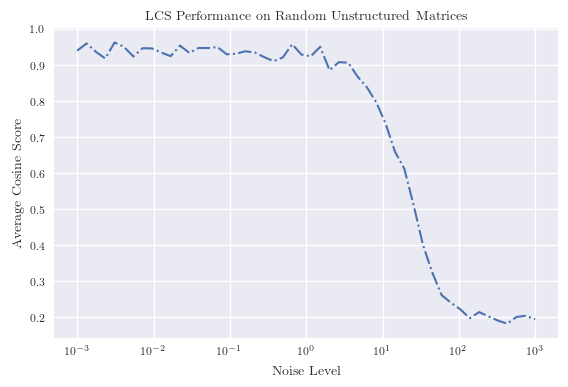

In [4]:
# PLOT SETTINGS
include("./sep_plot_settings.jl")


plt.figure(figsize=set_size(doc_textwidth))
plt.plot(noise_levels, scores)
plt.xscale("log")
plt.xlabel("Noise Level")
plt.ylabel("Average Cosine Score")
plt.title("LCS Performance on Random Unstructured Matrices")
plt.show()